# Python for Social Science

<img src="../figures/PySocs_banner.png" width="50%" align="left">

# Introduction to Pandas

![Zimbabwe](../figures/Zimbabwe.png)

In this section, we introduce the pandas library, tailored for social science researchers. We will cover key topics including data structures, data loading, exploration, cleaning, transformation, and basic analysis.

Pandas provides versatile data structures and manipulation tools, making data cleaning and analysis fast and efficient in Python.

While pandas adopts many coding conventions from NumPy, its main advantage lies in managing tabular or heterogeneous data, whereas NumPy excels with homogeneous numerical array data.

In [1]:
import numpy as np
import pandas as pd

## Basic data structures in pandas

Pandas provides two workhorse data structures, Series and DataFrame:

- **Series**: a one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.
- **DataFrame**: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

### Series

A series is a one-dimensional sequence of values, similar to NumPy's array object.

In [117]:
arr = np.array([2, 4, 6, np.nan, 8, 10])
arr

array([ 2.,  4.,  6., nan,  8., 10.])

The simplest Pandas Series can be constructed similarly:

In [2]:
s = pd.Series([2, 4, 6, np.nan, 8, 10])
s

0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64

In [118]:
pd.Series(arr)

0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64

In [119]:
s.values

array([ 2.,  4.,  6., nan,  8., 10.])

In [121]:
type(s.values)

numpy.ndarray

#### Series as a NumPy array plus Index

A distinctive feature of a Series is its array of data labels, known as the index:

In [103]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [105]:
list(s.index)

[0, 1, 2, 3, 4, 5]

Since we did not specify an index for the data, a default one consisting of the integers $0$ through $N - 1$ (where $N$ is the length of the data) is created.

#### Series with Index Labels

We can create a Series with an index identifying each value with a label. For example,

In [55]:
s = pd.Series([2, 4, 6, np.nan, 8, 10], 
             index=["a", "b", "c", "d", "e", "f"])
s

a     2.0
b     4.0
c     6.0
d     NaN
e     8.0
f    10.0
dtype: float64

In [56]:
s.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

#### Practice Exercise 1

You are analyzing the number of hours different students studied for an exam.
The data you collected is:

| Student | Hours Studied |
| ------- | ------------- |
| Alice   | 5             |
| Bob     | 7             |
| Charlie | 4             |
| Diana   | 6             |

1. Create a Pandas Series called `study_hours`:
2. The values should be the number of hours studied.
3. The index should be the names of the students.
4. Print the Series to confirm that the data and index were set correctly.
5. Access the study hours for "Charlie" using index.
6. Update Diana's study hours to 8.
7. Check which students studied more than 5 hours using boolean filtering.

In [165]:
# Create a Pandas Series called `study_hours`
# YOUR CODE HERE


Alice      5
Bob        7
Charlie    4
Diana      6
dtype: int64


In [166]:
# Access the study hours for "Charlie".
# YOUR CODE HERE


4

In [167]:
# Update Diana's study hours to 8.
# YOUR CODE HERE


Alice      5
Bob        7
Charlie    4
Diana      8
dtype: int64

In [168]:
# Check which students studied more than 5 hours using boolean filtering.
# YOUR CODE HERE


Bob      7
Diana    8
dtype: int64

The values of a Series, which is a NumPy array, can be retrieved as follows:

#### Access Series with Labels

Compared with NumPy arrays, you can use the index when selecting one or more values:

In [18]:
s = pd.Series([2, 4, 6, np.nan, 8, 10], 
             index=["a", "b", "c", "d", "e", "f"])
s['a']

2.0

In [13]:
s[['a', 'c', 'b']]

a    2.0
c    6.0
b    4.0
dtype: float64

Because a Series stores its data as a NumPy array, you can apply any operation suitable for NumPy arrays to a Series.

In [19]:
s[0:3] += 1
s

a     3.0
b     5.0
c     7.0
d     NaN
e     8.0
f    10.0
dtype: float64

Slicing with labels behaves differently than Python slicing in that the end-point is **inclusive**:

In [20]:
s['a':'d']

a    3.0
b    5.0
c    7.0
d    NaN
dtype: float64

Computations with Series are vectorized, much like operations on NumPy arrays.

In [21]:
s * 2 + 10

a    16.0
b    20.0
c    24.0
d     NaN
e    26.0
f    30.0
dtype: float64

Boolean filters can still be used to select elements that meet specific conditions.

In [22]:
s[s > 5]

c     7.0
e     8.0
f    10.0
dtype: float64

The `isnull()` and `notnull()` functions are used to identify missing values.

In [23]:
pd.isnull(s)

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

In [24]:
pd.notnull(s)

a     True
b     True
c     True
d    False
e     True
f     True
dtype: bool

Boolean arrays can be used to select specific elements, such as non-missing values.

In [25]:
s[pd.notnull(s)]

a     3.0
b     5.0
c     7.0
e     8.0
f    10.0
dtype: float64

In [26]:
pd.notnull(s).sum()

5

Pandas Series index labels can contain duplicates!
Pandas does not require index labels to be unique, unlike some database systems. However, duplicate labels affect how you access and manipulate the data:

In [44]:
s = pd.Series([10, 20, 30, 40], index=['A', 'B', 'A', 'C'])
print(s)

A    10
B    20
A    30
C    40
dtype: int64


Notice that 'A' appears twice. 

Duplicates are allowed in a Pandas Series index. If there are duplicates, `.loc['A']` returns a Series containing all matching entries, not just one value.

In [45]:
s.loc["A"]

A    10
A    30
dtype: int64

In [46]:
s.index.is_unique

False

#### Series as a Dictionary

Another way to think about a Series is as a dictionary.

In [48]:
s = pd.Series({"a": 2, "b": 4, "c": 6, "d": np.nan, "e": 8, "f": 10})
s

a     2.0
b     4.0
c     6.0
d     NaN
e     8.0
f    10.0
dtype: float64

It can be used in many contexts where you might use a dictionary.

In [126]:
"f" in s

True

In [127]:
"g" in s

False

#### Integer Indexing

Working with pandas objects that use integer-based indexing can often introduce bugs because their indexing semantics differ from those of Python’s built-in data structures, such as lists and tuples.

In [27]:
s = pd.Series([2, 4, 6, np.nan, 8, 10], 
             index=[1, 2, 3, 4, 5, 6])
s

1     2.0
2     4.0
3     6.0
4     NaN
5     8.0
6    10.0
dtype: float64

For example, you might expect the following to return the first and last elements of `s`; however, both will raise a `KeyError`.

```python
s[0]
s[-1]
```

On the other hand, when using label-based indexing, both methods function as expected.

In [256]:
s = pd.Series([2, 4, 6, np.nan, 8, 10], 
             index=["a", "b", "c", "d", "e", "f"])
print(s[0])
print(s[-1])

2.0
10.0


To avoid this ambiguity, pandas offers two specific indexing methods: `loc` for label-based indexing and `iloc` for integer-based indexing.

In [258]:
s = pd.Series([2, 4, 6, np.nan, 8, 10], 
             index=[1, 2, 3, 4, 5, 6])

print(s.iloc[0])
print(s.iloc[-1])

2.0
10.0


In [259]:
print(s.loc[1])
print(s.loc[6])

2.0
10.0


In [53]:
s.iloc[1:3]

b    4.0
c    6.0
dtype: float64


Notice that Slicing returns a Series, not a list.

#### Key Difference: .iloc vs .loc

| Action                  | `.iloc` (position-based)             | `.loc` (label-based)           |
| ----------------------- | ------------------------------------ | ------------------------------ |
| Single integer or label | Returns **scalar value only**        | Returns **scalar value only**  |
| Slice or list           | Returns **Series with labels**       | Returns **Series with labels** |
| Index meaning           | Strictly **positional** (like lists) | **Label-based**                |


#### Practice Exercise 2

You are analyzing monthly sales revenue (in thousands of dollars) for a retail store during 2024. The data is given below:

| Month | Sales |
| ----- | ----- |
| Jan   | 52    |
| Feb   | 47    |
| Mar   | 53    |
| Apr   | 59    |
| May   | 62    |
| Jun   | 58    |
| Jul   | 66    |
| Aug   | 64    |
| Sep   | 63    |
| Oct   | 67    |
| Nov   | 71    |
| Dec   | 75    |


In [28]:
import calendar

# Get short month names (Jan, Feb, ..., Dec)
# calendar.month_abbr[0] is an empty string ('') by design, so you slice from [1:].

list(calendar.month_abbr)[1:]  # Skip the empty string at index 0

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

**Step 1**. Create the Series, `sales`, where:
 - The sales values are the data.
 - The month names are the index.

In [51]:
# YOUR CODE HERE


Jan    52
Feb    47
Mar    53
Apr    59
May    62
Jun    58
Jul    66
Aug    64
Sep    63
Oct    67
Nov    71
Dec    75
dtype: int64

**Step 2**. Practice `.iloc`

 - Retrieve the first three months of sales.
 - Get the last month’s sales.
 - Get the sales for months at positions 2, 5, and 8.
 - Slice from April to August using .iloc.

In [31]:
# Retrieve the first three months of sales.
sales.iloc[:3]

Jan    52
Feb    47
Mar    53
dtype: int64

In [32]:
# Get the last month’s sales.
sales.iloc[-1]

75

In [33]:
# Get the sales for months at positions 2, 5, and 8.
sales.iloc[[2, 5, 8]]

Mar    53
Jun    58
Sep    63
dtype: int64

In [40]:
# Slice from April to August using .iloc.
sales.iloc[3:8]

Apr    59
May    62
Jun    58
Jul    66
Aug    64
dtype: int64

**Step 3**. Practice `.loc`

 - Retrieve the sales for March.
 - Get the sales for June through September (inclusive).
 - Select sales for March, July, and December in a single call.
 - Update the sales for February to 50.

In [36]:
# Retrieve the sales for March.
sales.loc["Mar"]

53

In [41]:
# Get the sales for June through September (inclusive).
sales.loc["Jun":"Sep"]

Jun    58
Jul    66
Aug    64
Sep    63
dtype: int64

In [42]:
# Select sales for March, July, and December in a single call.
sales.loc[["Mar", "Jul", "Dec"]]

Mar    53
Jul    66
Dec    75
dtype: int64

In [43]:
# Update the sales for February to 50.
sales.loc["Feb"] = 50
sales

Jan    52
Feb    50
Mar    53
Apr    59
May    62
Jun    58
Jul    66
Aug    64
Sep    63
Oct    67
Nov    71
Dec    75
dtype: int64

#### Arithmetic and Data Alignment

Arithmetic operations with pandas Series objects are performed after aligning the objects by their indexes.

In [260]:
s1 = pd.Series([2.5, 7.6, 1.9, 9.8], index=['b', 'a', 'e', 'd'])
s2 = pd.Series([3.3, 1.4, 3.5, 6.5, 7.1], index=['a', 'b', 'd', 'f', 'g'])

s1 + s2

a    10.9
b     3.9
d    13.3
e     NaN
f     NaN
g     NaN
dtype: float64

In [261]:
s1.index.intersection(s2.index)

Index(['b', 'a', 'd'], dtype='object')

### DataFrame 

If a pandas Series is analogous to a 1D NumPy array with explicit indices, then a DataFrame is comparable to a 2D array with explicit row and column labels.

The following example is adapted from vanderPlas (2023, p. 105).

In [65]:
# land area of 5 states
area_dict = {
    'California': 423967,
    'Florida': 170312,
    'New York': 141297,
    "Pennsylvania": 119280,
    'Texas': 695662,
}
area_dict

{'California': 423967,
 'Florida': 170312,
 'New York': 141297,
 'Pennsylvania': 119280,
 'Texas': 695662}

In [66]:
# population of 5 states
pop_dict = {
    'California': 39538223,
    'Texas': 29145505,
    'Florida': 21538187,
    'New York': 20201249,
    'Pennsylvania': 13002700
}
pop_dict

{'California': 39538223,
 'Texas': 29145505,
 'Florida': 21538187,
 'New York': 20201249,
 'Pennsylvania': 13002700}

In [67]:
# constructing a DataFrame from dictionaries
states = pd.DataFrame({'area': area_dict, 
                       'population': pop_dict})
states

,area,population
California,423967,39538223
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700
Texas,695662,29145505


Notice that the two columns are aligned by their indices!

The DataFrame object has an index attribute like Series.

In [137]:
states.index

Index(['California', 'Florida', 'New York', 'Pennsylvania', 'Texas'], dtype='object')

In addition, the DataFrame object has a `columns` attribute. 

In [138]:
states.columns

Index(['area', 'population'], dtype='object')

In [139]:
# retriving a column
states['area']

California      423967
Florida         170312
New York        141297
Pennsylvania    119280
Texas           695662
Name: area, dtype: int64

In [68]:
# retrieving columns
states[['population', 'area']]

,population,area
California,39538223,423967
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280
Texas,29145505,695662


Another method to construct a DataFrame is to combine separate column lists with `zip()`.

In [73]:
state = ['California', 'Florida', 'New York', 'Pennsylvania', 'Texas']
population = [39538223, 21538187, 20201249, 13002700, 29145505]
area = [423967, 170312, 141297, 119280, 695662]

In [78]:
states = pd.DataFrame(zip(population, area), 
                      columns=['population', 'area'],
                      index=state)
states

,population,area
California,39538223,423967
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280
Texas,29145505,695662


#### DataFrame from a 2D NumPy Array

Because the DataFrame object is essentially a 2D array that can hold different data types, we can create it from a two-dimensional NumPy array—as a special case where all columns contain the same data type.

In [118]:
states_other = pd.DataFrame(np.random.rand(5, 2), # random normal deviates
                            columns=['col3', "col4"],
                            index=['Texas', 'Pennsylvania', 'New York', 'Florida', 'California' ])
states_other

,col3,col4
Texas,0.526586,0.984203
Pennsylvania,0.275015,0.263037
New York,0.943459,0.490134
Florida,0.424423,0.839169
California,0.658009,0.831472


In [119]:
# Joining on the index
states.join(states_other)

,population,area,col3,col4
California,39538223,423967,0.658009,0.831472
Florida,21538187,170312,0.424423,0.839169
New York,20201249,141297,0.943459,0.490134
Pennsylvania,13002700,119280,0.275015,0.263037
Texas,29145505,695662,0.526586,0.984203


A useful feature of pandas objects is that they automatically align data based on index labels.

#### Accessing Columns of a DataFrame

A column in a DataFrame can be retrieved the usual way:

In [152]:
states["population"]

California      39538223
Florida         21538187
New York        20201249
Pennsylvania    13002700
Texas           29145505
Name: population, dtype: int64

We can also retrieve a column by using the dot notation (attribute notation):

In [153]:
states.population

California      39538223
Florida         21538187
New York        20201249
Pennsylvania    13002700
Texas           29145505
Name: population, dtype: int64

#### Accessing Rows of a DataFrame

Rows can be retrieved by position or name with an integer (`iloc`) or a label (`loc`):

In [156]:
states.iloc[4]

area            695662
population    29145505
Name: Texas, dtype: int64

In [157]:
states.loc["Texas"]

area            695662
population    29145505
Name: Texas, dtype: int64

In [160]:
states.iloc[0:3] # exclusive

,area,population
California,423967,39538223
Florida,170312,21538187
New York,141297,20201249


In [163]:
states.loc["California":"New York"] # inclusive

,area,population
California,423967,39538223
Florida,170312,21538187
New York,141297,20201249


In [175]:
states.iloc[2:, [0, 1, 3]] # Rows 0-2, Columns 0 and 1

,area,population,density
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893
Texas,695662,29145505,41.896072


In [181]:
states[states.area > 5e5]

,area,population,flower,density
Texas,695662,29145505,Bluebonnet,41.896072


#### Practice Exercise 3

You are working as a data analyst for a retail company.
The dataset below shows monthly sales revenue (in thousands of dollars) and units sold for three store branches during the first 6 months of 2024.

| Month | Branch  | Sales | Units\_Sold |
| ----- | ------- | ----- | ----------- |
| Jan   | East    | 52000 | 1200        |
| Jan   | West    | 51000 | 1150        |
| Jan   | Central | 49500 | 1100        |
| Feb   | East    | 47000 | 1050        |
| Feb   | West    | 46500 | 1040        |
| Feb   | Central | 46000 | 1030        |
| Mar   | East    | 53000 | 1250        |
| Mar   | West    | 52500 | 1240        |
| Mar   | Central | 51500 | 1230        |
| Apr   | East    | 59000 | 1300        |
| Apr   | West    | 57500 | 1290        |
| Apr   | Central | 56500 | 1280        |
| May   | East    | 62000 | 1320        |
| May   | West    | 61500 | 1310        |
| May   | Central | 61000 | 1300        |
| Jun   | East    | 58000 | 1260        |
| Jun   | West    | 57000 | 1250        |
| Jun   | Central | 56000 | 1240        |


You can use the data components below to create the DataFrame (Make sure the column names are as specified).

In [62]:
months = ['Jan','Jan','Jan','Feb','Feb','Feb','Mar','Mar','Mar',
          'Apr','Apr','Apr','May','May','May','Jun','Jun','Jun']

branches = ['East','West','Central'] * 6

sales = [52000,51000,49500,47000,46500,46000,
         53000,52500,51500,59000,57500,56500,
         62000,61500,61000,58000,57000,56000]

units_sold = [1200,1150,1100,1050,1040,1030,
              1250,1240,1230,1300,1290,1280,
              1320,1310,1300,1260,1250,1240]

In [80]:
# Create the DataFrame 'df_sales' and print


   Month   Branch  Sales  Units_Sold
0    Jan     East  52000        1200
1    Jan     West  51000        1150
2    Jan  Central  49500        1100
3    Feb     East  47000        1050
4    Feb     West  46500        1040
5    Feb  Central  46000        1030
6    Mar     East  53000        1250
7    Mar     West  52500        1240
8    Mar  Central  51500        1230
9    Apr     East  59000        1300
10   Apr     West  57500        1290
11   Apr  Central  56500        1280
12   May     East  62000        1320
13   May     West  61500        1310
14   May  Central  61000        1300
15   Jun     East  58000        1260
16   Jun     West  57000        1250
17   Jun  Central  56000        1240


**Tasks** for Position-Based Indexing

 1. Select the first 5 rows of the DataFrame.
 2. Get the value in the 10th row and 3rd column (Sales value).
 3. Select the first 10 rows and first two columns only.
 4. Extract rows 5, 8, and 12 and columns 1 and 2.
 5. Get the last 3 rows using negative indices.
 6. Slice rows 6–12 (inclusive) and all columns.

In [89]:
# Select the first 5 rows of the DataFrame.


,Month,Branch,Sales,Units_Sold
0,Jan,East,52000,1200
1,Jan,West,51000,1150
2,Jan,Central,49500,1100
3,Feb,East,47000,1050
4,Feb,West,46500,1040


In [84]:
# Get the value in the 10th row and 3rd column (Sales value).


59000

In [85]:
# Select the first 10 rows and first two columns only.


,Month,Branch
0,Jan,East
1,Jan,West
2,Jan,Central
3,Feb,East
4,Feb,West
5,Feb,Central
6,Mar,East
7,Mar,West
8,Mar,Central
9,Apr,East


In [86]:
# Extract row indexes 5, 8, and 12 and columns 1 and 2.


,Branch,Sales
5,Central,46000
8,Central,51500
12,East,62000


In [92]:
# Get the last 3 rows using negative indices.


,Month,Branch,Sales,Units_Sold
15,Jun,East,58000,1260
16,Jun,West,57000,1250
17,Jun,Central,56000,1240


In [97]:
# Slice rows 6–12 (inclusive) and all columns.


,Month,Branch,Sales,Units_Sold
6,Mar,East,53000,1250
7,Mar,West,52500,1240
8,Mar,Central,51500,1230
9,Apr,East,59000,1300
10,Apr,West,57500,1290
11,Apr,Central,56500,1280
12,May,East,62000,1320


**Tasks** for Label-Based Indexing

 1. Select all rows for the 'Mar' month.
 2. Get the Sales and Units_Sold for 'East' branch in May.
 3. Retrieve rows where Month is 'Feb' or 'Mar' and only the columns `['Month', 'Branch', 'Sales']`.
 4. Update the Units_Sold for 'West' in Apr to 1305.
 5. Get Sales values for months Apr through Jun (inclusive).
 6. Filter rows where Sales > 60,000.

In [103]:
# Select all rows for the 'Mar' month.


,Month,Branch,Sales,Units_Sold
6,Mar,East,53000,1250
7,Mar,West,52500,1240
8,Mar,Central,51500,1230


In [111]:
# Get the Sales and Units_Sold for 'East' branch in May.


,Sales,Units_Sold
12,62000,1320


In [113]:
# Retrieve rows where Month is 'Feb' or 'Mar' and only the columns ['Month', 'Branch', 'Sales']


,Month,Branch,Sales
3,Feb,East,47000
4,Feb,West,46500
5,Feb,Central,46000
6,Mar,East,53000
7,Mar,West,52500
8,Mar,Central,51500


In [114]:
# Update the Units_Sold for 'West' in Apr to 1305.


,Month,Branch,Sales,Units_Sold
0,Jan,East,52000,1200
1,Jan,West,51000,1150
2,Jan,Central,49500,1100
3,Feb,East,47000,1050
4,Feb,West,46500,1040
5,Feb,Central,46000,1030
6,Mar,East,53000,1250
7,Mar,West,52500,1240
8,Mar,Central,51500,1230
9,Apr,East,59000,1300


In [115]:
# Get Sales values for months Apr through Jun (inclusive).


9     59000
10    57500
11    56500
12    62000
13    61500
14    61000
15    58000
16    57000
17    56000
Name: Sales, dtype: int64

In [116]:
# Filter rows where Sales > 60,000.


,Month,Branch,Sales,Units_Sold
12,May,East,62000,1320
13,May,West,61500,1310
14,May,Central,61000,1300


#### Adding/Removing Columns

A DataFrame in pandas is essentially a table consisting of rows and columns. The ability to add or remove columns is fundamental for data manipulation, cleaning, and analysis.

Let's revisit the `states` DataFrame and add a `flowers` column to represent the state flowers.

In [121]:
flowers = ['California poppy', 
           'Orange blossom', 
           'Rose', 
           'Mountain laurel', 
           'Bluebonnet']

states['flower'] = flowers
states

,population,area,flower
California,39538223,423967,California poppy
Florida,21538187,170312,Orange blossom
New York,20201249,141297,Rose
Pennsylvania,13002700,119280,Mountain laurel
Texas,29145505,695662,Bluebonnet


A new column can be added by performing calculations on existing columns.

In [172]:
states["density"] = states["population"] / states["area"]
states

,area,population,flower,density
California,423967,39538223,California poppy,93.257784
Florida,170312,21538187,Orange blossom,126.463121
New York,141297,20201249,Rose,142.970120
Pennsylvania,119280,13002700,Mountain laurel,109.009893
Texas,695662,29145505,Bluebonnet,41.896072


#### Working with DataFrame - Illustration

Here's a brief illustration of how to use a DataFrame for various tasks.

In [122]:
# DataFrame example: students
students = pd.DataFrame({
    'student_id': range(1,9),
    'name': ['Ana', 'Ben', 'Carmen', 'Diego', 'Eli', 'Farah', 'George', 'Hana'],
    'age': [17, 18, 17, 19, 18, 17, 20, 18],
    'math_score': [88, 92, 79, 85, np.nan, 90, 73, 95],
    'english_score': [91, 85, 84, np.nan, 78, 88, 80, 94],
    'school': ['North HS','North HS','East HS','East HS','West HS','West HS','North HS','East HS']
})

students

,student_id,name,age,math_score,english_score,school
0,1,Ana,17,88.0,91.0,North HS
1,2,Ben,18,92.0,85.0,North HS
2,3,Carmen,17,79.0,84.0,East HS
3,4,Diego,19,85.0,NaN,East HS
4,5,Eli,18,NaN,78.0,West HS
5,6,Farah,17,90.0,88.0,West HS
6,7,George,20,73.0,80.0,North HS
7,8,Hana,18,95.0,94.0,East HS


In [123]:
# Drop rows with any missing values
students.dropna()

,student_id,name,age,math_score,english_score,school
0,1,Ana,17,88.0,91.0,North HS
1,2,Ben,18,92.0,85.0,North HS
2,3,Carmen,17,79.0,84.0,East HS
5,6,Farah,17,90.0,88.0,West HS
6,7,George,20,73.0,80.0,North HS
7,8,Hana,18,95.0,94.0,East HS


Rows 3 and 4 each contain one missing value and have been removed.

We can use a specific column(s) for `dropna()` as follows:

In [124]:
students.dropna(subset='math_score')

,student_id,name,age,math_score,english_score,school
0,1,Ana,17,88.0,91.0,North HS
1,2,Ben,18,92.0,85.0,North HS
2,3,Carmen,17,79.0,84.0,East HS
3,4,Diego,19,85.0,NaN,East HS
5,6,Farah,17,90.0,88.0,West HS
6,7,George,20,73.0,80.0,North HS
7,8,Hana,18,95.0,94.0,East HS


Note that the fourth student, whose `english_score` is missing, is still included.

We can also specify the minimum number of non-NA values to be retained. For example, `thresh=6` means keep only rows (`axis=0`) or columns (`axis=1`) that have at least 6 non-NA values.

In [132]:
students.dropna(thresh=6, axis=0)

,student_id,name,age,math_score,english_score,school
0,1,Ana,17,88.0,91.0,North HS
1,2,Ben,18,92.0,85.0,North HS
2,3,Carmen,17,79.0,84.0,East HS
5,6,Farah,17,90.0,88.0,West HS
6,7,George,20,73.0,80.0,North HS
7,8,Hana,18,95.0,94.0,East HS


We can determine whether each cell contains a missing value or a non-missing (non-NA) value.

In [186]:
students.isnull()

,student_id,name,age,math_score,english_score,school
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,True,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False


In [189]:
students.isna().sum(axis=0)

student_id       0
name             0
age              0
math_score       1
english_score    1
school           0
dtype: int64

In [202]:
students.isna().sum(axis=1)

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    0
dtype: int64

#### Handling Missing Data in Computations

In real-world datasets, missing values (`NaN`) are common and can interfere with computations, summaries, and modeling. Proper handling of missing data is essential to ensure accurate analysis.

Properly handling missing data ensures that calculations, statistics, and models reflect the true patterns in your dataset without being skewed by gaps.

In [203]:
# Create avg_score as the mean of math_score and english_score
students['avg_score'] = students[['math_score', 'english_score']].mean(axis=1)
students

,student_id,name,age,math_score,english_score,school,avg_score
0,1,Ana,17,88.0,91.0,North HS,89.5
1,2,Ben,18,92.0,85.0,North HS,88.5
2,3,Carmen,17,79.0,84.0,East HS,81.5
3,4,Diego,19,85.0,NaN,East HS,85.0
4,5,Eli,18,NaN,78.0,West HS,78.0
5,6,Farah,17,90.0,88.0,West HS,89.0
6,7,George,20,73.0,80.0,North HS,76.5
7,8,Hana,18,95.0,94.0,East HS,94.5


The result may seem unexpected because `.mean(axis=1)` ignores `NaN` values by default. If you want `avg_score` to be `NaN` whenever either `math_score` or `english_score` is missing, use the `skipna=False` option.

In [204]:
students['avg_score'] = students[['math_score', 'english_score']].mean(axis=1, skipna=False)
students

,student_id,name,age,math_score,english_score,school,avg_score
0,1,Ana,17,88.0,91.0,North HS,89.5
1,2,Ben,18,92.0,85.0,North HS,88.5
2,3,Carmen,17,79.0,84.0,East HS,81.5
3,4,Diego,19,85.0,NaN,East HS,NaN
4,5,Eli,18,NaN,78.0,West HS,NaN
5,6,Farah,17,90.0,88.0,West HS,89.0
6,7,George,20,73.0,80.0,North HS,76.5
7,8,Hana,18,95.0,94.0,East HS,94.5


Alternatively, you can use `np.where` to explicitly manage any missing data.

In [205]:
students['avg_score'] = np.where(
    students[['math_score', 'english_score']].isna().any(axis=1),
    np.nan,
    students[['math_score', 'english_score']].mean(axis=1)
)
students

,student_id,name,age,math_score,english_score,school,avg_score
0,1,Ana,17,88.0,91.0,North HS,89.5
1,2,Ben,18,92.0,85.0,North HS,88.5
2,3,Carmen,17,79.0,84.0,East HS,81.5
3,4,Diego,19,85.0,NaN,East HS,NaN
4,5,Eli,18,NaN,78.0,West HS,NaN
5,6,Farah,17,90.0,88.0,West HS,89.0
6,7,George,20,73.0,80.0,North HS,76.5
7,8,Hana,18,95.0,94.0,East HS,94.5


### Aggregating Data with groupby

![groupby](../figures/split_apply_combine.png)

Data often comes in a nested or hierarchical format, where individual observations are grouped into subgroups. In such cases, we typically need to summarize or aggregate data within each subgroup. This can be done by splitting a DataFrame by a grouping key into multiple DataFrames, each corresponding to a subgroup. 

The `groupby()` method in Pandas is a powerful tool for this task. It implements the **split-apply-combine** strategy:

1. **Split** – Divide the data into groups based on one or more keys (e.g., by school, region, or product category).
2. **Apply** – Perform a function on each group, like mean(), sum(), or count().
3. **Combine** – Merge the results back into a new summarized DataFrame.

**Step 1**. Group Data

In [232]:
grouped = students.groupby('school')
grouped

This code doesn't perform any calculation yet. It creates a DataFrameGroupBy object, which organizes the rows into three groups: East HS, North HS, and West HS. At this stage, it only displays meta-information—not the actual grouped data. To view the data in each subgroup, you need to loop over the object.

In [230]:
for group, data in students.groupby('school'):
    print(f"School: {group}")
    print(data, "\n")

School: East HS
   student_id    name  age  math_score  english_score   school  avg_score
2           3  Carmen   17        79.0           84.0  East HS       81.5
3           4   Diego   19        85.0            NaN  East HS        NaN
7           8    Hana   18        95.0           94.0  East HS       94.5 

School: North HS
   student_id    name  age  math_score  english_score    school  avg_score
0           1     Ana   17        88.0           91.0  North HS       89.5
1           2     Ben   18        92.0           85.0  North HS       88.5
6           7  George   20        73.0           80.0  North HS       76.5 

School: West HS
   student_id   name  age  math_score  english_score   school  avg_score
4           5    Eli   18         NaN           78.0  West HS        NaN
5           6  Farah   17        90.0           88.0  West HS       89.0 



**Step 2**. Aggregate 

A. Single Aggregation

Compute the mean math score for each school:

In [233]:
grouped['math_score'].mean()

school
East HS     86.333333
North HS    84.333333
West HS     90.000000
Name: math_score, dtype: float64

B. Multiple Aggregations

Use `.agg()` to compute several summary statistics at once:

In [234]:
grouped['math_score'].agg(['min', 'mean', 'max'])

,min,mean,max
school,,,
East HS,79.0,86.333333,95.0
North HS,73.0,84.333333,92.0
West HS,90.0,90.000000,90.0


C. Aggregating Multiple Columns

To summarize multiple numeric columns, pass a dictionary mapping each column to its aggregation functions:

In [235]:
grouped.agg({
    'math_score': ['min', 'mean', 'std'],
    'english_score': ['min', 'mean', 'max']
})

math_score                       english_score                 
                min       mean        std           min       mean   max
school                                                                  
East HS        79.0  86.333333   8.082904          84.0  89.000000  94.0
North HS       73.0  84.333333  10.016653          80.0  85.333333  91.0
West HS        90.0  90.000000        NaN          78.0  83.000000  88.0

#### Summary of Key Methods

| Method        | Purpose                               |
| ------------- | ------------------------------------- |
| `.mean()`     | Average per group                     |
| `.sum()`      | Sum per group                         |
| `.count()`    | Count of non-missing values per group |
| `.agg()`      | Apply multiple functions at once      |
| `.size()`     | Count of rows per group               |
| `.describe()` | Full summary stats per group          |


## Illustration - The SAFI Project

![SAFI](../figures/SAFI.png)

SAFI (Studying African Farmer-Led Irrigation) is a currently running project which is looking at farming and irrigation methods. This is survey data relating to households and agriculture in Tanzania and Mozambique. The survey data was collected through interviews conducted between November 2016 and June 2017. The survey covered such things as; household features (e.g. construction materials used, number of household members), agricultural practices (e.g. water usage), assets (e.g. number and types of livestock) and details about the household members.

This is a teaching version of the collected data, it is not the full dataset.

Source:[here](https://http://www.safi-research.org/)

### Survey Sections:

-    **A**: General questions about when and where the survey was conducted.
-    **B**: Information about the household and how long they have been living in the area
-    **C**: Details about the accommodation and other buildings on the farm
-    **D**: Details about the different plots of land they grow crops on
-    **E**: Details about how they irrigate the land and availability of water
-    **F**: Financial details including assets owned and sources of income
-    **G**: Details of Financial hardships
-    **X**: Information collected directly from the smartphone (GPS) or automatically included in the form (instanceID)

#### Section A: Interview & Household Info

| Variable | Description |
|----------|-------------|
| key_id | Added to provide a unique Id for each observation. (The InstanceID field does this as well but it is not as convenient to use) |
| A01_interview_date | Date of Interview |
| A03_quest_no | Questionnaire number |
| A04_start | Timestamp of start of Interview |
| A05_end | Timestamp of end of Interview |
| A06_province | Province name |
| A07_district | District name |
| A08_ward | Ward name |
| A09_village | Village name |
| A11_years_farm | Number of years the household have been farming in this area |
| A12_agr_assoc | Does the head of the household belong to an agricultural association |
| _note2 | Possible form comment relating to the section |

#### Section B: Household Members

| Variable | Description |
|----------|-------------|
| B_no_membrs | How many members of the household? |
| _members_count | Internal count of members |
| B11_remittance_money | Is there any financial assistance from family members not living on the farm |
| B16_years_liv | How many years have you been living in this village or neighbouring village? |
| B17_parents_liv | Did your parents live in this village or neighbouring village? |
| B18_sp_parents_liv | Did your spouse's parents live in this village or neighbouring village? |
| B19_grand_liv | Did your grandparents live in this village or neighbouring village? |
| B20_sp_grand_liv | Did your spouse's grandparents live in this village or neighbouring village? |

#### Section C: House & Buildings

| Variable | Description |
|----------|-------------|
| C01_respondent_roof_type | What type of roof does their house have? |
| C02_respondent_wall_type | What type of walls does their house have (from list) |
| C02_respondent_wall_type_other | What type of walls does their house have (not on list) |
| C03_respondent_floor_type | What type of floor does their house have |
| C04_window_type | Does the house have glass in at least one window? |
| C05_buildings_in_compound | How many buildings are in the compound? Do not include stores, toilets or temporary structures. |
| C06_rooms | How many rooms in the main house are used for sleeping? |
| C07_other_buildings | Does the DU own any other buildings other than those on this plot |

#### Section D: Plots Cultivated

| Variable | Description |
|----------|-------------|
| D_no_plots | How many plots were cultivated in the last 12 months? |
| D_plots_count | Internal count of plots |

#### Section E: Water & Irrigation

| Variable | Description |
|----------|-------------|
| E01_water_use | Do you bring water to your fields, stop water leaving your fields or drain water out of any of your fields? |
| E_no_group_count | How many plots are irrigated? |
| E_yes_group_count | How many plots are not irrigated? |
| E17_no_enough_water | Are there months when you cannot get enough water for your crops? Indicate which months. |
| E18_months_no_water | Please select the months |
| E19_period_use | For how long have you been using these methods of watering crops? (years) |
| E20_exper_other | Do you have experience of such methods on other farms? |
| E21_other_meth | Have you used other methods before? |
| E22_res_change | Why did you change the way of watering your crops? |
| E23_memb_assoc | Are you a member of an irrigation association? |
| E24_resp_assoc | Do you have responsibilities in that association? |
| E25_fees_water | Do you pay fees to use water? |
| E26_affect_conflicts | Have you been affected by conflicts with other irrigators in the area? |
| _note | Form comment for section |

#### Section F: Money, Labor & Livestock

| Variable | Description |
|----------|-------------|
| F04_need_money | If you started or changed the way you water your crops recently, did you need any money for it? |
| F05_money_source | Where did the money came from? (list) |
| F05_money_source_other | Where did the money came from? (not on list) |
| F06_crops_contr | Considering fields where you have applied water, how much do those crops contribute to your overall income? |
| F08_emply_lab | In the most recent cultivation season, did you employ day labourers on fields? |
| F09_du_labour | In the most recent cultivation season, did anyone in the household undertake day labour work on other farm? |
| F10_liv_owned | What types of livestock do you own? (list) |
| F10_liv_owned_other | What types of livestock do you own? (not on list) |
| F_liv_count | Livestock count |
| F12_poultry | Own poultry? |
| F13_du_look_aftr_cows | At the present time, does the household look after cows for someone else in return for milk or money? |
| F14_items_owned | Which of the following items are owned by the household? (list) |
| F14_items_owned_other | Which of the following items are owned by the household? (not on list) |

#### Section G: Food Security

| Variable | Description |
|----------|-------------|
| G01_no_meals | How many meals do people in your household normally eat in a day? |
| G02_months_lack_food | Indicate which months, in the last 12 months have you faced a situation when you did not have enough food to feed the household? |
| G03_no_food_mitigation | When you have faced such a situation what do you do? |

#### GPS & Submission

| Variable | Description |
|----------|-------------|
| gps:Latitude | Location latitude (provided by smartphone) |
| gps:Longitude | Location Longitude (provided by smartphone) |
| gps:Altitude | Location Altitude (provided by smartphone) |
| gps:Accuracy | Location accuracy (provided by smartphone) |
| instanceID | Unique identifier for the form data submission |


### Browsing Data

In [46]:
# Load Data
df_survey = pd.read_csv('../data/Moz_SAFI_Survey_Final_results.csv', index_col=0)
df_survey.shape

(131, 64)

In [47]:
df_survey.head()

,A01_interview_date,A03_quest_no,A04_start,A05_end,A06_province,A07_district,A08_ward,A09_village,A11_years_farm,A12_agr_assoc,_note2,B_no_membrs,_members_count,B11_remittance_money,B16_years_liv,B17_parents_liv,B18_sp_parents_liv,B19_grand_liv,B20_sp_grand_liv,C01_respondent_roof_type,C02_respondent_wall_type,C02_respondent_wall_type_other,C03_respondent_floor_type,C04_window_type,C05_buildings_in_compound,C06_rooms,C07_other_buildings,D_no_plots,D_plots_count,E01_water_use,E_no_group_count,E_yes_group_count,E17_no_enough_water,E18_months_no_water,E19_period_use,E20_exper_other,E21_other_meth,E22_res_change,E23_memb_assoc,E24_resp_assoc,E25_fees_water,E26_affect_conflicts,_note,F04_need_money,F05_money_source,F05_money_source_other,F06_crops_contr,F08_emply_lab,F09_du_labour,F10_liv_owned,F10_liv_owned_other,F_liv_count,F12_poultry,F13_du_look_aftr_cows,F14_items_owned,F14_items_owned_other,G01_no_meals,G02_months_lack_food,G03_no_food_mitigation,gps:Latitude,gps:Longitude,gps:Altitude,gps:Accuracy,instanceID
key_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,no,NaN,3,3,no,4,no,yes,no,yes,grass,muddaub,NaN,earth,no,1,1,no,2,2,no,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,['poultry'],NaN,1,yes,no,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,NaN,7,7,no,9,yes,yes,yes,yes,grass,muddaub,NaN,earth,no,1,1,no,3,3,yes,NaN,3.0,yes,['Aug' ; 'Sept'],2.0,yes,no,NaN,yes,no,no,once,NaN,no,NaN,NaN,more_half,yes,no,['oxen' ; 'cows' ; 'goats'],NaN,3,yes,no,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,no,NaN,10,10,no,15,no,no,no,no,mabatisloping,burntbricks,NaN,cement,yes,1,1,no,1,1,no,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,yes,['none'],NaN,1,yes,no,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,no,NaN,7,7,no,6,no,no,no,no,mabatisloping,burntbricks,NaN,earth,no,1,1,no,3,3,no,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,yes,['oxen' ; 'cows'],NaN,2,yes,no,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,no,NaN,7,7,no,40,yes,no,yes,no,grass,burntbricks,NaN,earth,no,1,1,no,2,2,no,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,['oxen' ; 'cows' ; 'goats' ; 'poultry'],NaN,4,yes,no,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [268]:
df_survey.tail()

,A01_interview_date,A03_quest_no,A04_start,A05_end,A06_province,A07_district,A08_ward,A09_village,A11_years_farm,A12_agr_assoc,...,F14_items_owned,F14_items_owned_other,G01_no_meals,G02_months_lack_food,G03_no_food_mitigation,gps:Latitude,gps:Longitude,gps:Altitude,gps:Accuracy,instanceID
key_id,,,,,,,,,,,,,,,,,,,,,
127,18 May 2017,126,2017-05-18T04:13:37.000Z,2017-05-18T04:35:47.000Z,Manica,Manica,Bandula,Ruaca,5,yes,...,['motorcyle' ; 'radio' ; 'solar_panel'],NaN,3,['Oct' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'lab_ex_food'],-19.112194,33.483379,700,7.0,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965
128,04 June 2017,193,2017-06-04T09:36:20.000Z,2017-06-04T10:13:32.000Z,Manica,Manica,Bandula,Ruaca,10,no,...,['car' ; 'lorry' ; 'television' ; 'radio' ;...,NaN,3,['none'],['na'],-19.112157,33.483390,720,9.0,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df
129,04 June 2017,194,2017-06-04T10:13:36.000Z,2017-06-04T10:32:06.000Z,Manica,Manica,Bandula,Ruaca,5,no,...,['radio' ; 'solar_panel' ; 'solar_torch' ; ...,NaN,3,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.112271,33.483471,719,10.0,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf
130,04 June 2017,199,2017-06-04T10:33:55.000Z,2017-06-04T10:52:22.000Z,Manica,Manica,Bandula,Chirodzo,17,yes,...,['cow_cart' ; 'lorry' ; 'motorcyle' ; 'comp...,NaN,3,['Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduc...,-19.112278,33.483390,711,5.0,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b
131,04 June 2017,200,2017-06-04T10:52:46.000Z,2017-06-04T11:08:13.000Z,Manica,Manica,Bandula,Chirodzo,20,yes,...,['radio' ; 'cow_plough' ; 'solar_panel' ; '...,NaN,3,['Oct' ; 'Nov'],['rely_less_food' ; 'restrict_adults' ; 'bor...,-19.112183,33.483372,681,20.0,uuid:aa77a0d7-7142-41c8-b494-483a5b68d8a7


In [48]:
df_survey.shape

(131, 64)

In [49]:
df_survey.columns

Index(['A01_interview_date', 'A03_quest_no', 'A04_start', 'A05_end',
       'A06_province', 'A07_district', 'A08_ward', 'A09_village',
       'A11_years_farm', 'A12_agr_assoc', '_note2', 'B_no_membrs',
       '_members_count', 'B11_remittance_money', 'B16_years_liv',
       'B17_parents_liv', 'B18_sp_parents_liv', 'B19_grand_liv',
       'B20_sp_grand_liv', 'C01_respondent_roof_type',
       'C02_respondent_wall_type', 'C02_respondent_wall_type_other',
       'C03_respondent_floor_type', 'C04_window_type',
       'C05_buildings_in_compound', 'C06_rooms', 'C07_other_buildings',
       'D_no_plots', 'D_plots_count', 'E01_water_use', 'E_no_group_count',
       'E_yes_group_count', 'E17_no_enough_water', 'E18_months_no_water',
       'E19_period_use', 'E20_exper_other', 'E21_other_meth', 'E22_res_change',
       'E23_memb_assoc', 'E24_resp_assoc', 'E25_fees_water',
       'E26_affect_conflicts', '_note', 'F04_need_money', 'F05_money_source',
       'F05_money_source_other', 'F06_crops_cont

In [271]:
df_survey.columns.to_list()

['A01_interview_date',
 'A03_quest_no',
 'A04_start',
 'A05_end',
 'A06_province',
 'A07_district',
 'A08_ward',
 'A09_village',
 'A11_years_farm',
 'A12_agr_assoc',
 '_note2',
 'B_no_membrs',
 '_members_count',
 'B11_remittance_money',
 'B16_years_liv',
 'B17_parents_liv',
 'B18_sp_parents_liv',
 'B19_grand_liv',
 'B20_sp_grand_liv',
 'C01_respondent_roof_type',
 'C02_respondent_wall_type',
 'C02_respondent_wall_type_other',
 'C03_respondent_floor_type',
 'C04_window_type',
 'C05_buildings_in_compound',
 'C06_rooms',
 'C07_other_buildings',
 'D_no_plots',
 'D_plots_count',
 'E01_water_use',
 'E_no_group_count',
 'E_yes_group_count',
 'E17_no_enough_water',
 'E18_months_no_water',
 'E19_period_use',
 'E20_exper_other',
 'E21_other_meth',
 'E22_res_change',
 'E23_memb_assoc',
 'E24_resp_assoc',
 'E25_fees_water',
 'E26_affect_conflicts',
 '_note',
 'F04_need_money',
 'F05_money_source',
 'F05_money_source_other',
 'F06_crops_contr',
 'F08_emply_lab',
 'F09_du_labour',
 'F10_liv_owned',


Count the missing values in each column, create a DataFrame from these counts, and keep only the rows where there is at least one missing value. Note that the tick marks in `N Missing` were due to the space in the column name.

In [102]:
df_survey.isnull().sum().to_frame(name='N Missing').query("`N Missing` > 0")

,N Missing
_note2,131
C02_respondent_wall_type_other,131
E_no_group_count,92
E_yes_group_count,39
E17_no_enough_water,39
E18_months_no_water,45
E19_period_use,39
E20_exper_other,39
E21_other_meth,39
E22_res_change,127


### Survey Locations

This teaching version of the full dataset is a subset consisting of 131 surveys collected in Zimbabwe. The data includes the latitude and longitude of each location, enabling you to map the sites geographically.

The `folium` package is not installed by default in the Anaconda distribution. While it is available through `conda`, it’s not included in the default `conda` channel. Instead, you can install it from `conda-forge`, which provides a broader selection of packages.

To install `folium`, remove the `#` and run the following code cell:

In [15]:
#!conda install -c conda-forge folium -y

In [15]:
# Load required package
import folium

In [21]:
# --------------------------------------------
# Step 1. Prepare a dataset
# --------------------------------------------

df_loc = df_survey[['A09_village', 'gps:Latitude', 'gps:Longitude']].rename(
    columns={
        'A09_village': 'Location',
        'gps:Latitude': 'Latitude',
        'gps:Longitude': 'Longitude' 
    }
)

# --------------------------------------------
# Step 2. Create a folium map centered on Africa
# --------------------------------------------
# Africa center roughly: Latitude = 0, Longitude = 20
africa_map = folium.Map(location=[0, 20], zoom_start=3)

# --------------------------------------------
# Step 3. Add points to the map
# --------------------------------------------
for _, row in df_loc.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']}<br>Lat: {row['Latitude']}, Lon: {row['Longitude']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(africa_map)

# --------------------------------------------
# Display map inline in Jupyter Notebook
# --------------------------------------------
africa_map

### Data Wrangling

Survey data often includes composite variables created from multi-select questions, such as "check all that apply." 

For example, one variable in our survey is `F14_items_owned_cleaned`, based on the question: "Which of the following items are owned by the household?" Respondents could select from a list of 15 household items.

We can break this composite variable into several new variables, with each one representing whether a particular asset is owned in the household (as a dummy variable). This process is known as **one-hot encoding**.

In [86]:
print(df_survey['F14_items_owned'])

key_id
1      ['bicycle' ;  'television' ;  'solar_panel' ; ...
2      ['cow_cart' ;  'bicycle' ;  'radio' ;  'cow_pl...
3                                        ['solar_torch']
4      ['bicycle' ;  'radio' ;  'cow_plough' ;  'sola...
5      ['motorcyle' ;  'radio' ;  'cow_plough' ;  'mo...
6                                                    NaN
7                          ['motorcyle' ;  'cow_plough']
8      ['motorcyle' ;  'bicycle' ;  'television' ;  '...
9       ['television' ;  'solar_panel' ;  'solar_torch']
10     ['cow_cart' ;  'motorcyle' ;  'bicycle' ;  'te...
11                             ['radio' ;  'cow_plough']
12     ['cow_cart' ;  'bicycle' ;  'radio' ;  'cow_pl...
13     ['bicycle' ;  'radio' ;  'cow_plough' ;  'mobi...
14     ['bicycle' ;  'radio' ;  'cow_plough' ;  'sola...
15     ['bicycle' ;  'radio' ;  'cow_plough' ;  'sola...
16     ['radio' ;  'cow_plough' ;  'solar_panel' ;  '...
17                                      ['mobile_phone']
18                      

In [90]:
print(df_survey['F14_items_owned_cleaned'].dtype)

object


This means the column contains strings or mixed types. There are some `NaN` values present, which are special floating-point values defined in NumPy (`numpy.nan`).

Missing values in object columns cannot be represented as integers or floats, so Pandas uses `numpy.nan` instead.

Another issue is that some string values contain '[]', which should be removed before parsing.

You can also use `;` to split a list into individual items.

Since there is no built-in function to parse the string variable exactly as needed, you will need to create a custom parsing function or parser.

#### Custom Parser

To summarize, we need a parser that
1. Returns an empty list `[]` for `NaN` or '[]'.
2. Cleans the string:
    - Remove brackets '[]'
    - Split on ';'
    - Strip extra quotes and whitespace

In [41]:
def parse_assets(x):
    if pd.isna(x):
        return []
    
    x = str(x).strip()
    if x in {"[]", ""}:
        return []

    x = x.strip("[]")
    
    items = [
        item.strip().strip("'\"")  # clean quotes and spaces
        for item in x.split(";")
        if item.strip()
    ]
    return items


Let’s go line by line and carefully explain what this `parse_assets` function does. It’s designed to take a raw string or missing value (`NaN`) representing assets and return a cleaned list of individual assets.

**Step 1**

```python
def parse_assets(x):
```

Defines a function called `parse_assets` that takes one argument `x`.

`x` is expected to be either a string representing assets (e.g., `['Car'; 'Bike']`) or possibly a missing value (`NaN`).

**Step 2**

```python
if pd.isna(x):
    return []
```

Uses `pd.isna(x)` to check if `x` is missing (`NaN` or `None`).

If it is missing, return an empty list `[]`, since there are no assets.

**Step 3**

```python
x = str(x).strip()
```

Converts `x` to a string (in case it’s not already).

`.strip()` removes leading and trailing whitespace.

Example: " ['Car'; 'Bike'] " → "['Car'; 'Bike']".

**Step 4**

```python
if x in {"[]", ""}:
    return []
```

Checks if `x` is an empty string `""` or `"[]"` (an empty list representation in string form).

If yes, return an empty list, because there are no assets.

**Step 5**

```python
x = x.strip("[]")
```

Removes leading and trailing square brackets `[` and `]`.

Example: `"['Car'; 'Bike']"` → `"'Car'; 'Bike'"`.

**Step 6**

```python
    items = [
        item.strip().strip("'\"")  # clean quotes and spaces
        for item in x.split(";")
        if item.strip()
    ]
```

This is a list comprehension. Let’s break it down:

    1. `x.split(";")`
        - Splits the string by semicolon `;` into individual items.
        - Example: `"'Car'; 'Bike'"` → `['Car', 'Bike']`.

    2. `item.strip()`
        - Removes leading/trailing whitespace from each item.

    3. `.strip("'\"")`
        - Removes single ' or double " quotes surrounding each item.

    4. `if item.strip()`
        - Only keeps items that are non-empty after stripping spaces.
        - This avoids empty strings in the list.
        - In an `if` statement, it evaluates the result for truthiness:
            * Non-empty strings → True
            * Empty strings → False

The result is a clean list of asset names.

**Step 7**

```python
return items
```

Returns the final list of cleaned asset names.

Example:

```python
parse_assets("['Car'; 'Bike'; 'Truck']")  
# Output: ['Car', 'Bike', 'Truck']

parse_assets(np.nan)  
# Output: []

parse_assets("[]")  
# Output: []
```

#### Applying `parse_assets()`

We can use the parser on `F14_items_owned` and generate a new column, `F14_items_owned_cleaned`, by applying the `.apply()` method as shown below:


In [91]:
df_survey['F14_items_owned_cleaned'] = df_survey['F14_items_owned'].apply(parse_assets)

#print("After parsing to Python lists:\n", df_survey, "\n")
print(df_survey['F14_items_owned_cleaned'])

key_id
1              [bicycle, television, solar_panel, table]
2      [cow_cart, bicycle, radio, cow_plough, solar_p...
3                                          [solar_torch]
4      [bicycle, radio, cow_plough, solar_panel, mobi...
5           [motorcyle, radio, cow_plough, mobile_phone]
6                                                     []
7                                [motorcyle, cow_plough]
8      [motorcyle, bicycle, television, radio, cow_pl...
9                 [television, solar_panel, solar_torch]
10     [cow_cart, motorcyle, bicycle, television, rad...
11                                   [radio, cow_plough]
12         [cow_cart, bicycle, radio, cow_plough, table]
13            [bicycle, radio, cow_plough, mobile_phone]
14     [bicycle, radio, cow_plough, solar_panel, tabl...
15      [bicycle, radio, cow_plough, solar_panel, table]
16         [radio, cow_plough, solar_panel, solar_torch]
17                                        [mobile_phone]
18                      

In [97]:
print(df_survey['F14_items_owned_cleaned'].apply(type).value_counts())

<class 'list'>    131
Name: F14_items_owned_cleaned, dtype: int64


#### One-Hot Encoding

One-hot encoding transforms a categorical variable with $k$ unique categories into $k$ separate binary columns.

    - Each column represents one category.
    - The value is 1 if the observation belongs to that category, and 0 otherwise.

For example, if a survey asks *“Which assets does your household own?”* and one household owns "Car" and "Bike", the one-hot encoded output might look like this:

| Car     | Bike     | TV      |
|---------|----------|---------|
| 1       | 1        | 0       |

#### Household Asset Ownership

Consider our survey dataset, where `F14_items_owned` contains messy strings representing the assets each household owns:

| Household | F14\_items\_owned  |
| --------- | ------------------ |
| 0         | "\['Car'; 'Bike']" |
| 1         | "\[]"              |
| 2         | NaN                |
| 3         | "\['TV'; 'Radio']" |

We first used the `parse_assets` function to convert the messy string into a Python list:

| Household | F14\_items\_owned\_cleaned |
| --------- | -------------------------- |
| 0         | \['Car', 'Bike']           |
| 1         | \[]                        |
| 2         | \[]                        |
| 3         | \['TV', 'Radio']           |


To figure out how many one-hot variables to create we can compile the lists under `F14_items_owned_cleaned` to create a set of unique items.

In [51]:
# Step 1: Get the unique set of all items
all_items = set(item for sublist in df_survey['F14_items_owned_cleaned'] for item in sublist)
print("Unique items found:", all_items, "\n")

Unique items found: {'solar_torch', 'mobile_phone', 'lorry', 'sterio', 'radio', 'cow_cart', 'table', 'motorcyle', 'bicycle', 'electricity', 'car', 'fridge', 'computer', 'sofa_set', 'solar_panel', 'cow_plough', 'television'} 



In [99]:
print(list(all_items))

['solar_torch', 'mobile_phone', 'lorry', 'sterio', 'radio', 'cow_cart', 'table', 'motorcyle', 'bicycle', 'electricity', 'car', 'fridge', 'computer', 'sofa_set', 'solar_panel', 'cow_plough', 'television']


In [100]:
len(all_items)

17

Let's go step-by-step and carefully break down what this code does. It's using a nested generator expression to collect all unique assets from a column where each cell contains a list of assets.

**The key part here is**:

```python
for sublist in df_survey['F14_items_owned_cleaned'] 
    for item in sublist
```

This is a nested loop written in a single line.

Equivalent expanded version:

```python
items_list = []
for sublist in df_survey['F14_items_owned_cleaned']:
    for item in sublist:
        items_list.append(item)
```

What this does:

    - Outer loop: Iterates over each row in the column.
        - Example: First iteration → sublist = ['Car', 'Bike']
    - Inner loop: Iterates over each item inside that list.
        - Example: 'Car', then 'Bike'

Result after this step would be a flat sequence:
`['Car', 'Bike', 'TV', 'Radio']`

**Wrapping with set(...)**

```python
all_items = set(item for sublist in df_survey['F14_items_owned_cleaned'] for item in sublist)
```

    - `set()` removes duplicates and stores only unique values
    - So even if multiple households own "Bike", it will appear only once

Example:

```python
['Car', 'Bike', 'Bike', 'TV', 'Radio']
↓
{'Car', 'Bike', 'TV', 'Radio'}
```

This technique is very common in Python when you want to flatten nested lists and remove duplicates at the same time.

In [52]:
# Step 2: Create binary columns for each item
for item in all_items:
    df_survey[item] = df_survey['F14_items_owned_cleaned'].apply(lambda x: int(item in x))

Here, we are creating one binary (0/1) column per unique item that indicates whether each household owns that item.

```python
for item in all_items:
```

    - Loop over every unique asset name stored in the `all_items` set (e.g. 'Car', 'Bike', 'TV', ...).

```python
df_survey[item] = ...
```

    - For the current item, create a new column in `df_survey` named exactly `item`. This will hold 0/1 values for every row.

```python
df_survey['F14_items_owned_cleaned'].apply(...)
```

    - Call `.apply()` on the column that contains lists of assets (one list per row). `.apply()` runs the provided function once per row value in that column and returns a Series of results which is assigned into the new column.

```python
lambda x: int(item in x)
```

    - For each row value `x` (which should be a list of assets):
        - `item` in `x` is a membership test that returns `True` if the item appears in that list, `False` otherwise.
        - `int(...)` converts `True` → `1` and `False` → `0`.
    - So each row gets 1 if the household owns item, else 0.
    
You might be wondering if there is a more concise alternative to this method. The `scikit-learn` package offers `MultiLabelBinarizer()`, which you may want to explore.

Finally, here are the one-hot encoded binary variables.

In [82]:
df_survey[list(all_items)].head()

,solar_torch,mobile_phone,lorry,sterio,radio,cow_cart,table,motorcyle,bicycle,electricity,car,fridge,computer,sofa_set,solar_panel,cow_plough,television
key_id,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


#### Using One-Hot Encoded Binary Variables

One-hot encoded binary variables are much easier to summarize, and many statistical modeling procedures can use them without additional processing.

For example, we can create a variable that counts the total number of positive values across the binary variables.

In [73]:
# Create a count variable summing up the binary variables
n_assets = df_survey[list(all_items)].sum(axis=1)
n_assets.head()

key_id
1    4
2    8
3    1
4    5
5    4
dtype: int64

In [74]:
# Create a frequency distribution
count_assets = n_assets.value_counts().sort_index()
count_assets.head()

0    10
1    14
2    11
3    16
4    14
dtype: int64

We can quickly visualize the distribution of the total count variable.

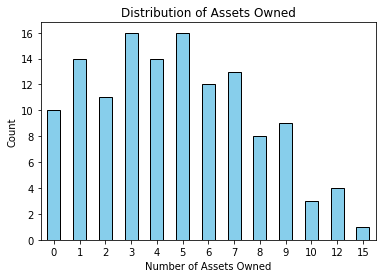

In [81]:
import matplotlib.pyplot as plt

# Plot the bar chart
count_assets.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Assets Owned")
plt.xlabel("Number of Assets Owned") 
plt.ylabel("Count")
plt.xticks(rotation=0)      # Keep labels horizontal
plt.show()

Calculating the percentage of each household item owned by respondents is simple.

In [84]:
df_survey[list(all_items)].describe().round(1)

,solar_torch,mobile_phone,lorry,sterio,radio,cow_cart,table,motorcyle,bicycle,electricity,car,fridge,computer,sofa_set,solar_panel,cow_plough,television
count,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0
mean,0.4,0.7,0.0,0.1,0.7,0.2,0.3,0.3,0.5,0.0,0.0,0.0,0.0,0.1,0.5,0.6,0.2
std,0.5,0.5,0.2,0.3,0.5,0.4,0.5,0.5,0.5,0.2,0.2,0.2,0.1,0.3,0.5,0.5,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Practice Exercise 4

Another variable of interest is `E18_months_no_water`, which records responses to the question: *'Are there months when you cannot obtain enough water for your crops? Please indicate which months.'*

The responses consist of a string variable that contains lists of months selected from a multi-select question (e.g., 'select all that apply').

In [115]:
print(df_survey['E18_months_no_water'].dtype)

object


In [122]:
df_survey['E18_months_no_water'].head(10)

key_id
1                            NaN
2              ['Aug' ;  'Sept']
3                            NaN
4                            NaN
5                            NaN
6                            NaN
7     ['Aug' ;  'Sept' ;  'Oct']
8              ['Sept' ;  'Oct']
9               ['Oct' ;  'Nov']
10    ['Sept' ;  'Oct' ;  'Nov']
Name: E18_months_no_water, dtype: object

In [112]:
df_survey['E18_months_no_water'].value_counts()

['Sept' ;  'Oct' ;  'Nov']                                                   21
['Sept' ;  'Oct']                                                            14
['Aug' ;  'Sept' ;  'Oct']                                                   11
['Aug' ;  'Sept' ;  'Oct' ;  'Nov']                                          10
['Oct' ;  'Nov']                                                              8
['Aug' ;  'Sept']                                                             6
['Aug' ;  'Sept' ;  'Oct' ;  'Nov' ;  'Dec']                                  4
['Oct']                                                                       2
['Nov' ;  'Dec']                                                              2
['Jan' ;  'Dec']                                                              2
['Nov']                                                                       1
['Apr' ;  'May' ;  'June' ;  'July' ;  'Aug' ;  'Sept' ;  'Oct' ;  'Nov']     1
['July' ;  'Aug' ;  'Sept' ;  'Oct' ;  '

Here are the tasks you need to complete:
- Create a custom parser similar to the one used for `F14_items_owned`.
    - Some months are incorrectly abbreviated, such as 'June', 'July', and 'Sept'.
    - Ensure the parser applies correct abbreviations for all months.
- Generate a cleaned version of the `E18_months_no_water_cleaned` variable.
- Apply one-hot encoding to convert months into binary variables.
- Use `.describe()` on the DataFrame with the one-hot encoded variables to display descriptive statistics.
- Generate a bar graph to show the count for each month.

In [132]:
# Create a custom parser


In [145]:
# Apply the parser to the column and save the result as 'E18_months_no_water_cleaned'.


key_id
1                  []
2          [Aug, Sep]
3                  []
4                  []
5                  []
6                  []
7     [Aug, Sep, Oct]
8          [Sep, Oct]
9          [Oct, Nov]
10    [Sep, Oct, Nov]
Name: E18_months_no_water_cleaned, dtype: object

Rather than deriving a unique set of month abbreviations, use the provided list to generate the complete set of one-hot encoded binary variables.

In [140]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [149]:
# Create one-hot encoded variables for each of the 12 months.


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
key_id,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,1,0,0
8,0,0,0,0,0,0,0,0,1,1,0,0
9,0,0,0,0,0,0,0,0,0,1,1,0


In [150]:
# Generate descriptive stats on the binary variables.


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.5,0.6,0.4,0.1
std,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.4,0.5,0.5,0.5,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0,0.0
max,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [157]:
# Create a count variable, `n_months`, summing up the binary variables.


key_id
1    0
2    2
3    0
4    0
5    0
dtype: int64

In [160]:
# Create a frequency distribution


Jan     2
Feb     0
Mar     0
Apr     1
May     1
Jun     1
Jul     2
Aug    33
Sep    70
Oct    74
Nov    51
Dec    11
dtype: int64

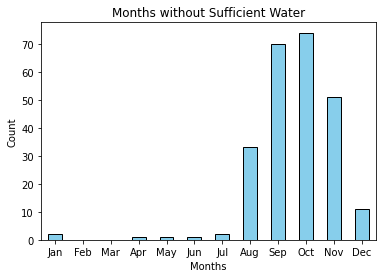

In [164]:
# Generate a bar graph


The expected output:

![No Water](../figures/months_no_water.png)

### Wrap Up

That's it for now. 
- There will be no DC course this week.
- Instead, please submit the in-class exercise notebook by noon on 9/29/2025.

BY PRINTING YOUR NAME BELOW, YOU CONFIRM THAT THE EXERCISES YOU SUBMITTED IN THIS NOTEBOOK ARE YOUR OWN AND THAT YOU DID NOT USE AI TO ASSIST WITH YOUR WORK.

In [ ]:
# PRINT YOUR NAME
print("Enter Your Name Here")